In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random
plt.rcParams['figure.figsize'] = [20, 7]

def above_or_below():
    if random.random() >= 0.5:
        return 1
    else:
        return -1
    
def org_data(m = 2, b = 0, k = 1, s = 10000):
    x = np.linspace(-25,25,s)
    y = m * (x ** k) + b
    return x, y
    

def Generate_Synthethic_Data(m = 2, b = 0, k = 1, s = 10000, random_samples = 500, lvl_noise = 7500):
    
    x, y = org_data(m, b, k, s)

    new_y = np.zeros(random_samples)
    new_x = np.zeros(random_samples)

    for elm in range(0,random_samples):
        # select a random x position
        r = random.randrange(len(x))
        # calculate noise value
        noise = random.uniform(0,lvl_noise)
        # calcualte above or below
        mul = above_or_below()
        # calculate new Y
        new_y[elm] = y[r] + (noise * mul)
        new_x[elm] = x[r]

    # Sort Samples
    np.sort(new_y)
    
    print('\nk = ' + str(k) + '\n')

    plt.plot(x, y, '-g', label = 'y = m* x^k + b')
    plt.plot(new_x, new_y, '.', label= 'y = m * x^k + b')
    plt.title('Graph of y = m * x^k + b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    
    return new_x, new_y


k = 1



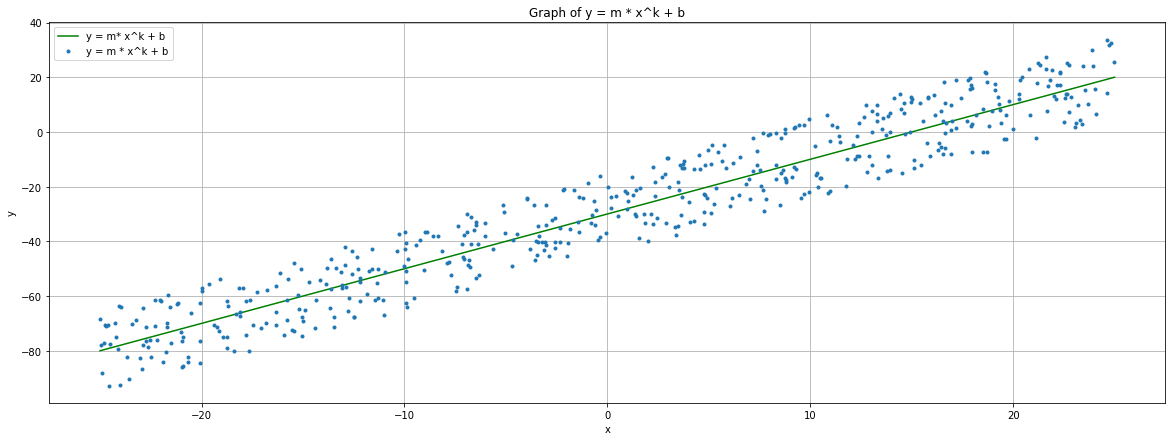


k = 2



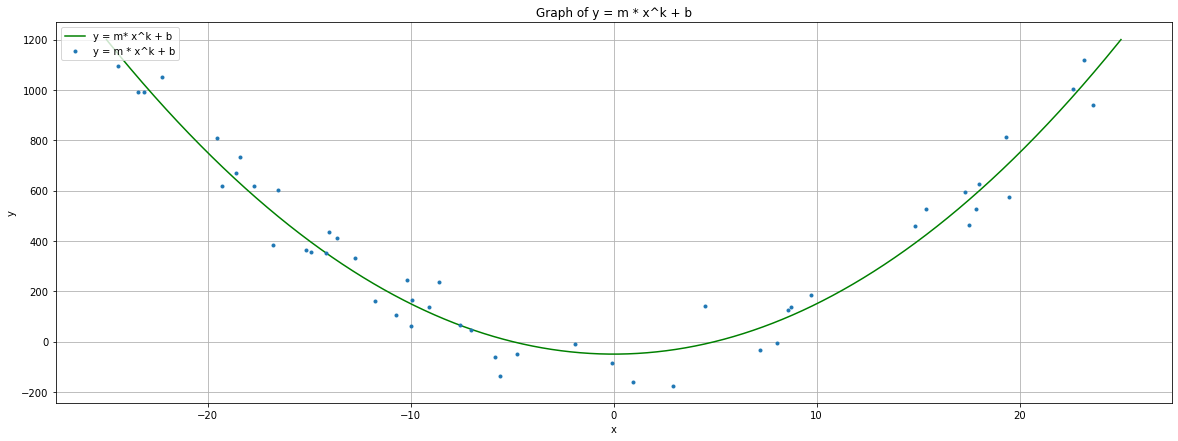


k = 3



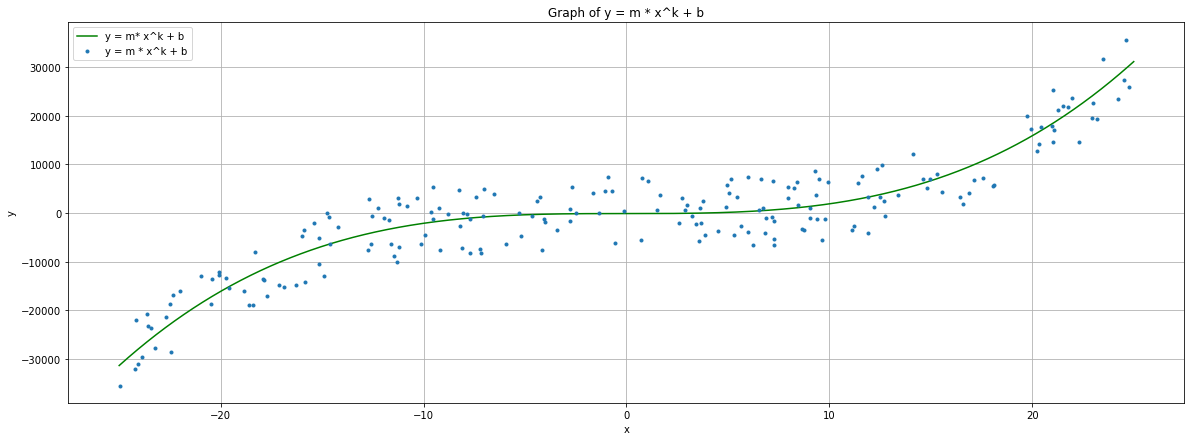

In [60]:
x1, y1 = Generate_Synthethic_Data(m = 2, b = -30, k = 1, s = 10000, random_samples = 500, lvl_noise = 15)
x2, y2 = Generate_Synthethic_Data(m = 2, b = -50, k = 2, s = 10000, random_samples = 50, lvl_noise = 150)
x3, y3 = Generate_Synthethic_Data(m = 2, b = -100, k = 3, s = 10000, random_samples = 200, lvl_noise = 7500)


k = 1



/home/rscd27/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rscd27/miniconda3/envs/py3/lib/python3.7/site-packages/imblearn/utils/validation.py:77: UserWarning: 'y' should be of types ('binary', 'multiclass') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))


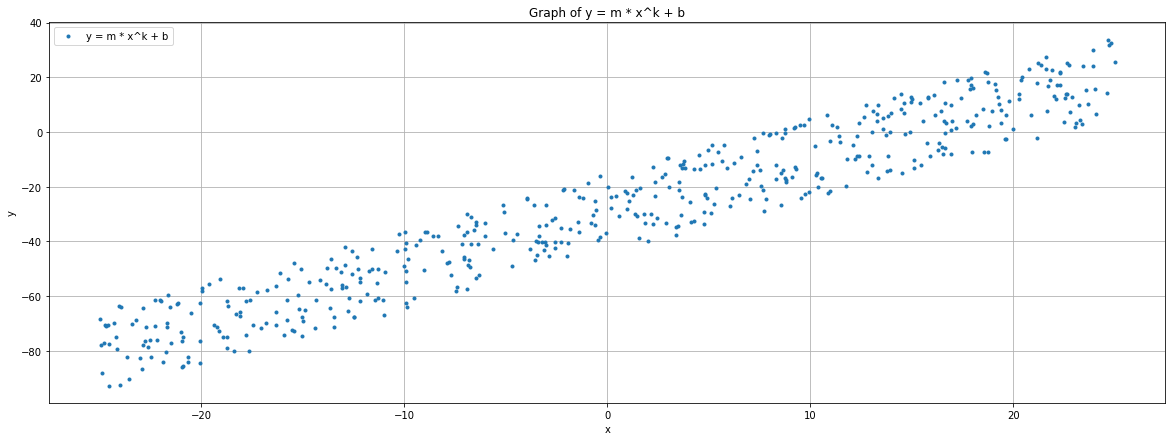

In [61]:
# Apply Synthetic datas Generation 

from imblearn.over_sampling import SMOTE,ADASYN

x1 = x1.reshape(-1,1)
y1 = y1.reshape(-1,1)
x_res1, y_res1 = SMOTE().fit_sample(x1, y1)

print('\nk = ' + str(k) + '\n')
plt.plot(x_res1, y_res1, '.', label= 'y = m * x^k + b')
plt.title('Graph of y = m * x^k + b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()